In [1]:
import numpy as np
import pandas as pd
import soundfile as sf
import matplotlib.pyplot as plt
import librosa
import os

(128, 217)
1


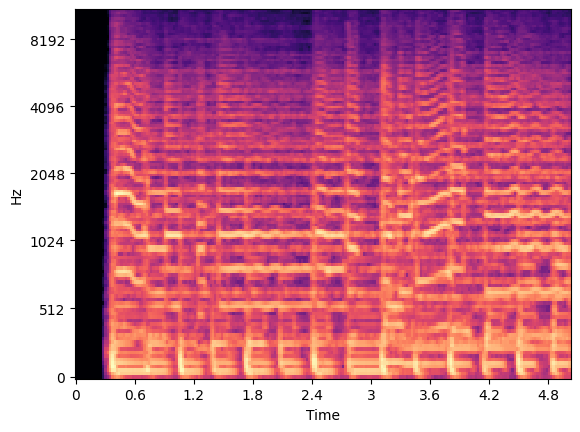

In [4]:
data = pd.read_csv('dataset.csv')
dataset_folder = "./IRMAS-TestingData"

def getdParam():
    dList = []
    for filename in data['name']:
        path = os.path.join(dataset_folder, filename + ".wav")
        audio, sr = librosa.load(path)
        dList.append(librosa.get_duration(y=audio, sr=sr))
    return dList

dmin = 5.019773242630386 # La fonction prend 1min30 à s'executer, on a donc sauvegardé le résultat dans une variable
dmean = 16.886306332321844 
dmax = 20.0
len = 2874

i = 0
for filename in data['name']:
    path = os.path.join(dataset_folder, filename + ".wav")
    audio, sr = librosa.load(path, duration = dmin)
    spectre = librosa.feature.melspectrogram(y = audio, sr = sr, n_mels = 128, fmax = 8000)
    fig, ax = plt.subplots()
    ptodb = librosa.power_to_db(spectre, ref=np.max)
    print(ptodb.shape)
    image = librosa.display.specshow(ptodb, ax=ax, y_axis='mel', x_axis='time')
    i = i + 1
    print(i)
    if i  ==  1: break
